In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data/heart.csv')

# Handle missing values (e.g., imputing with mode)
data['Thal'] = data['Thal'].fillna(data['Thal'].mode()[0])

# Define categorical and numerical features
categorical_features = ['ChestPain', 'Thal']
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features).tolist()  # Convert to list


# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  #sparse=False for non-sparse matrix
    ])

# Split data into training and testing sets
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Create a pipeline with preprocessing and Logistic Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

In [74]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data/heart.csv')

# Get the total number of records
total_records = len(data)

# Print the result
print(f"Total records in the dataset: {total_records}")

Total records in the dataset: 303


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/heart.csv')


In [ ]:
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
data_head = data.head()



In [ ]:
data_head


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
# Handle missing values in 'Thal' by imputing the most frequent value

data['Thal'] = data['Thal'].fillna(data['Thal'].mode()[0])


In [ ]:
# Separate features and target variable
X = data.drop(columns='Target')
y = data['Target']


In [ ]:
# Define categorical and numerical columns
categorical_features = ['ChestPain', 'Thal']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features)


In [ ]:
# Preprocessing: one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


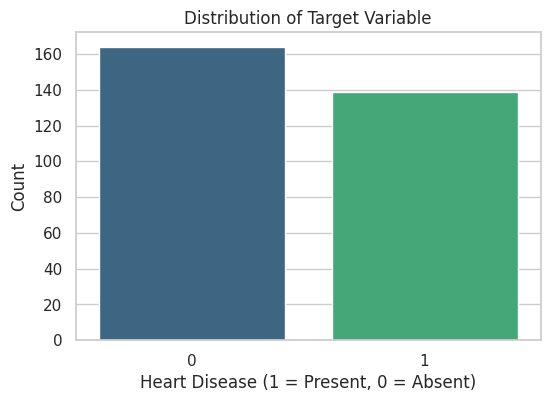

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")

#Distribution of the Target variable

plt.figure(figsize=(6, 4))
sns.countplot(x=data['Target'], palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Count')
plt.show()


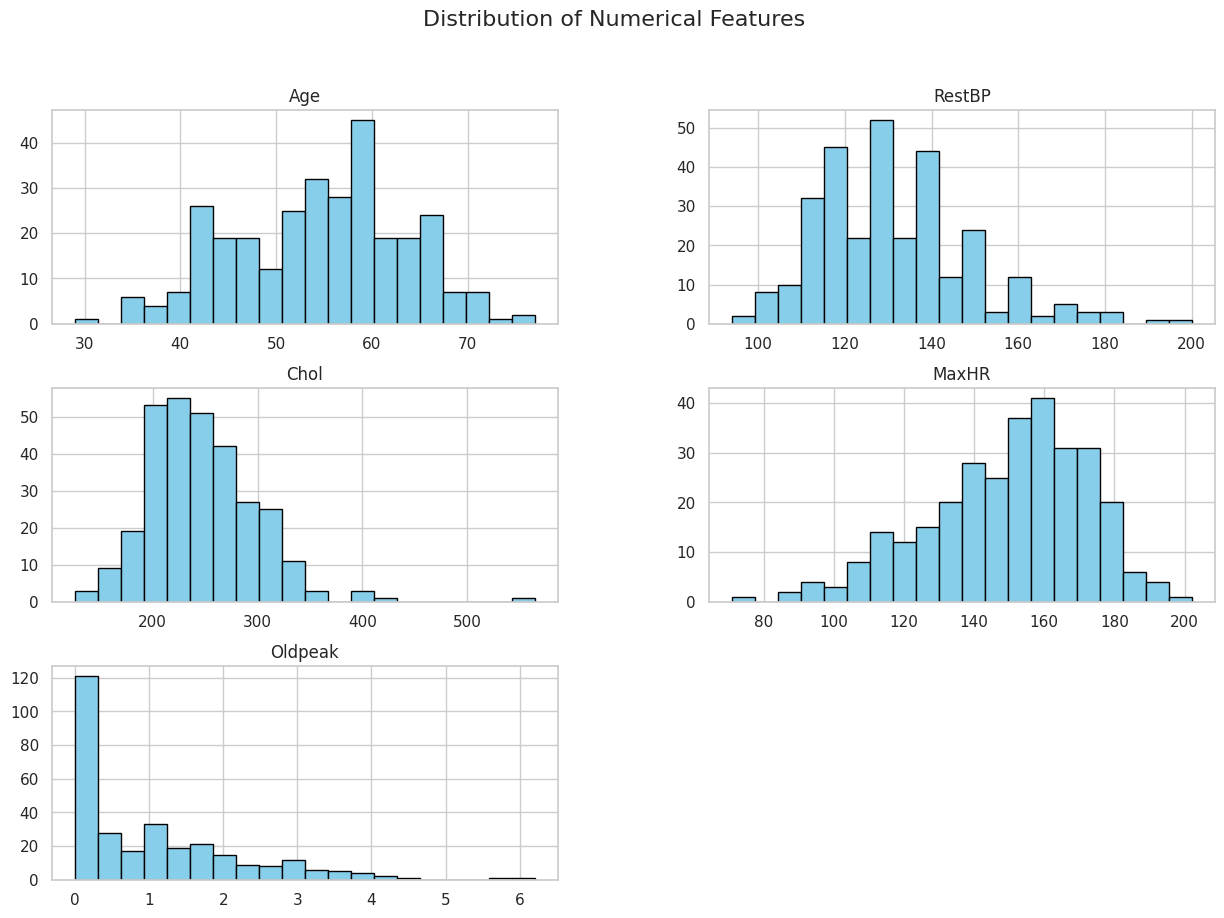

In [ ]:

#Histograms for numerical features
numerical_features = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
data[numerical_features].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()





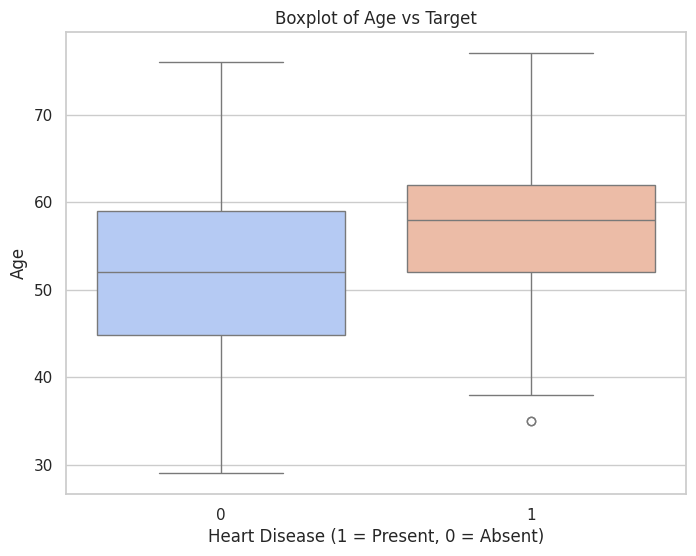

In [ ]:
#Boxplot to see the relationship between Age and Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Age', data=data, palette='coolwarm')
plt.title('Boxplot of Age vs Target')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Age')
plt.show()


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Create a pipeline for preprocessing and logistic regression

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
  ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Age', 'Ca', 'Chol', 'ExAng', 'Fbs', 'MaxHR', 'Oldpeak', 'RestBP',
       'RestECG', 'Sex', 'Slope'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['ChestPain', 'Thal'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Make predictions
y_pred = model_pipeline.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
accuracy

0.9016393442622951

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.94      0.88      0.91        33\n           1       0.87      0.93      0.90        28\n\n    accuracy                           0.90        61\n   macro avg       0.90      0.90      0.90        61\nweighted avg       0.90      0.90      0.90        61\n'

In [ ]:
import pickle

# Save the model to a file
filename = 'heart_disease_model.pkl'
pickle.dump(model_pipeline, open(filename, 'wb'))

In [ ]:
from google.colab import files
files.download('heart_disease_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>